In [49]:
import pandas as pd
data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)
df.set_index(['CUST_ID'],drop=True,inplace=True)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 17)


In [50]:
#make a copy for the original dataset
df_copy_scenario1=df.copy()

In [51]:
df_copy_scenario1['CREDIT_LIMIT'].fillna(df_copy_scenario1['CREDIT_LIMIT'].median(),inplace=True)
df_copy_scenario1['MINIMUM_PAYMENTS'].fillna(df_copy_scenario1['MINIMUM_PAYMENTS'].median(),inplace=True)

In [143]:
import numpy as np
import matplotlib.pyplot as plt
class PCA ():

    def __init__(self,n_components,typee ):
        self.n_components = n_components
        self.type=typee
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        
        self.mean =np.mean(X,axis=0) ##calculate mean
        self.variance =np.std(X,axis=0) ##calculate variance
        X_standarded=(X-self.mean) /self.variance #standarize x
        cov_matrix=np.cov(X_standarded.T) ##cal covariance matrix
        eign_values,eign_vectors=np.linalg.eig(cov_matrix) ##cal eign values and vectores
        index=np.argsort(eign_values)[: : -1]  ##get index of eign values descending
        eign_values_sorted=eign_values[index]##sort eign values
        explained_var_pca=eign_values_sorted/(np.sum(eign_values_sorted)) ##cal explained varaince ratio lambda/sum(lambdas)
        self.cum_sum_eignvalues=np.cumsum(explained_var_pca) ##cumulative sum of explained variance
        if(self.type=='var'):
                  full_components=eign_vectors[:,index] ##sort eign vectors
                  self.components=full_components[:, 0:self.n_components] ##subset for chosen components
                  self.eign_per_components=eign_values[ 0:self.n_components] ##subset for chosen eign values to draw plot
                  X_new=np.dot(X_standarded,self.components) ##transform data
        else :
            comp=np.where(self.cum_sum_eignvalues>=self.n_components)[0][1] ##return no of componeents matches perecent 
            full_components=eign_vectors[:,index] ##sort eign vectors
            self.components=full_components[:, 0:comp] ##slice the components chosen
            self.eign_per_components=eign_values[ 0:comp] ##slice eign values to draw plot
            X_new=np.dot(X_standarded,self.components)
            
        return X_new

    def transform(self,Z):
        Z_new = (Z - self.mean )/ self.variance
        Z_new = np.dot(Z_new,self.components)
        return Z_new

    #optional 
    def plot_explained_variance(self):
            eign_values_sorted=self.eign_per_components ##chosen components eign values sorted
            explained_var_pca=[]
            explained_var_pca=eign_values_sorted/(np.sum(eign_values_sorted))
            self.cum_sum_eignvalues=np.cumsum(explained_var_pca) ##cal explained variance ratio
            plt.step(range(0,len(self.cum_sum_eignvalues)),self.cum_sum_eignvalues, label='Individual explained variance')
            x=np.array(self.cum_sum_eignvalues)
            plt.axhline(x[np.where(x>0.95)[0][0]],color='r')
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal component index')






In [144]:
data=df_copy_scenario1.values
pca_section = PCA(n_components=0.95,typee='ratio')
X_transofmed = pca_section.fit(data)
components=pca_section.components
components.shape

(17, 12)

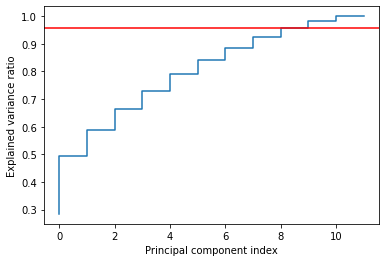

In [145]:
pca_section.plot_explained_variance()

# Using Sklearn

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
pca = PCA(n_components=6)
df_copy_scenario2=sc.fit_transform(df_copy_scenario1)
sklearn_pca=pd.DataFrame(pca.fit_transform(df_copy_scenario2))

Text(0.5, 0, 'Principal component index')

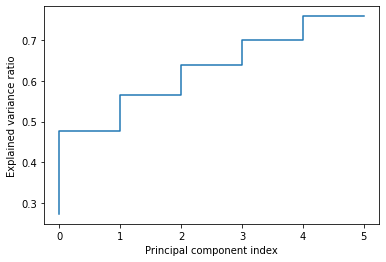

In [134]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(0,len(cum_sum_eigenvalues)),cum_sum_eigenvalues , label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

# New features

with Sklearn

In [135]:
sklearn_pca

,0,1,2,3,4,5
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004
...,...,...,...,...,...,...
8945,-0.362572,-2.013437,-0.975609,-2.742418,0.124714,2.673427
8946,-0.580810,-1.675663,-1.222354,-1.980537,-0.073504,3.312539
8947,-0.928985,-1.808048,-0.458242,-2.296301,0.234615,2.980784
8948,-2.337845,-0.653611,0.982831,-1.847692,-0.070276,3.179484


With my implemention

In [136]:
pd.DataFrame(X_transofmed)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.683649,1.072241,-0.475660,0.679928,-0.043195,-0.068069,0.822155,-0.018952,0.118336,-0.078196,0.235948,0.052497
1,-1.134085,-2.509150,-0.602216,-0.109542,-0.662638,1.102255,-0.384282,0.176154,0.674472,-0.777929,0.870746,0.607171
2,0.969395,0.383577,-0.090970,1.238359,2.166584,0.320185,-1.542496,-0.229364,-0.867803,-0.001744,0.762170,-0.683870
3,-0.888220,-0.004648,-1.499800,1.075271,-0.225828,0.171540,-0.236644,-0.690410,-0.064245,0.393690,-0.747670,-0.119186
4,-1.600021,0.683795,-0.347927,1.013642,0.453816,-0.077004,0.698278,0.245311,0.578032,-0.122073,0.455167,0.108719
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.362572,2.013437,0.975609,-2.742418,-0.124714,-2.673427,-1.561393,0.277404,1.371131,-0.845167,-0.194939,-0.020982
8946,-0.580810,1.675663,1.222354,-1.980537,0.073504,-3.312539,-1.068590,-0.639929,0.940227,-1.245566,-0.069507,-0.458772
8947,-0.928985,1.808048,0.458242,-2.296301,-0.234615,-2.980784,-1.403265,-0.292832,0.810029,-0.830136,-0.120176,-0.073141
8948,-2.337845,0.653611,-0.982831,-1.847692,0.070276,-3.179484,-0.973534,0.230863,1.205675,0.268663,0.306599,0.113269


In [27]:
x=np.array([1,2,3,4,5,6,7,11,22,54])

In [34]:
np.where((x>5))[0][0]

5

In [32]:
a = np.array([7,8,9,5,2,1,5,6,1])

print(np.where(a==1)[0][0])

5


In [109]:
x=[0.35980034 ,0.62754863 ,0.74371186, 0.84229666, 0.92434247 ,1.        ]

In [112]:
x=np.array(x)
x

array([0.35980034, 0.62754863, 0.74371186, 0.84229666, 0.92434247,
       1.        ])

In [114]:
x[np.where(x>0.95)[0][0]]

1.0